In [1]:
N = ord("D") % 3 + 1 # Denis

In [2]:
N

3

In [20]:
import csv
import numpy as np
from datetime import datetime

# 1. Функція для отримання значень заданого стовпця з CSV-файлу
def get_column_data(file_name, column_name):
    with open(file_name, mode='r', encoding='utf-8') as csv_file:
        reader = csv.DictReader(csv_file)
        data = [int(row[column_name]) for row in reader if row[column_name].isdigit()]
    return np.array(data)

# 2. Читання значень стовпця "APC"
csv_file = 'russia_losses_equipment.csv'
apc_values = get_column_data(csv_file, 'APC')

# Перевірка зчитаних даних
print(apc_values)

# 3. Розрахунок щоденних втрат БТР
daily_losses = -np.diff(apc_values)

# Перевірка результату
print("Щоденні втрати БТР:", daily_losses)

# 4. П'ять найбільших втрат за день
largest_losses = np.sort(daily_losses)[-5:]

# Виведення результату
print("Топ-5 найбільших втрат БТР за день:", largest_losses)

# 5. Втрати БТР за літній період 2023 року
def extract_dates(file_name):
    with open(file_name, mode='r', encoding='utf-8') as csv_file:
        reader = csv.reader(csv_file)
        headers = next(reader)
        date_index = headers.index('date')
        return [datetime.strptime(row[date_index], '%Y-%m-%d') for row in reader]

# Завантаження дат
dates_list = extract_dates(csv_file)

# Визначення меж літнього періоду
summer_start = datetime(2023, 6, 1)
summer_end = datetime(2023, 8, 31)

# Підрахунок втрат за літо
summer_apc_losses = sum(
    loss for date, loss in zip(dates_list[1:], daily_losses)
    if summer_start <= date <= summer_end
)

print("Втрати БТР влітку 2023 року:", summer_apc_losses)

# 6. Середнє значення щоденних втрат за дні 100–500
mean_losses = np.mean(daily_losses[100:500])

print("Середнє щоденне значення втрат БТР за 100–500 днів війни:", mean_losses)


[19369 19355 19339 ...   706   706   516]
Щоденні втрати БТР: [ 14  16  33 ... 110   0 190]
Топ-5 найбільших втрат БТР за день: [ 91  96 110 120 190]
Втрати БТР влітку 2023 року: 1135
Середнє щоденне значення втрат БТР за 100–500 днів війни: 21.335


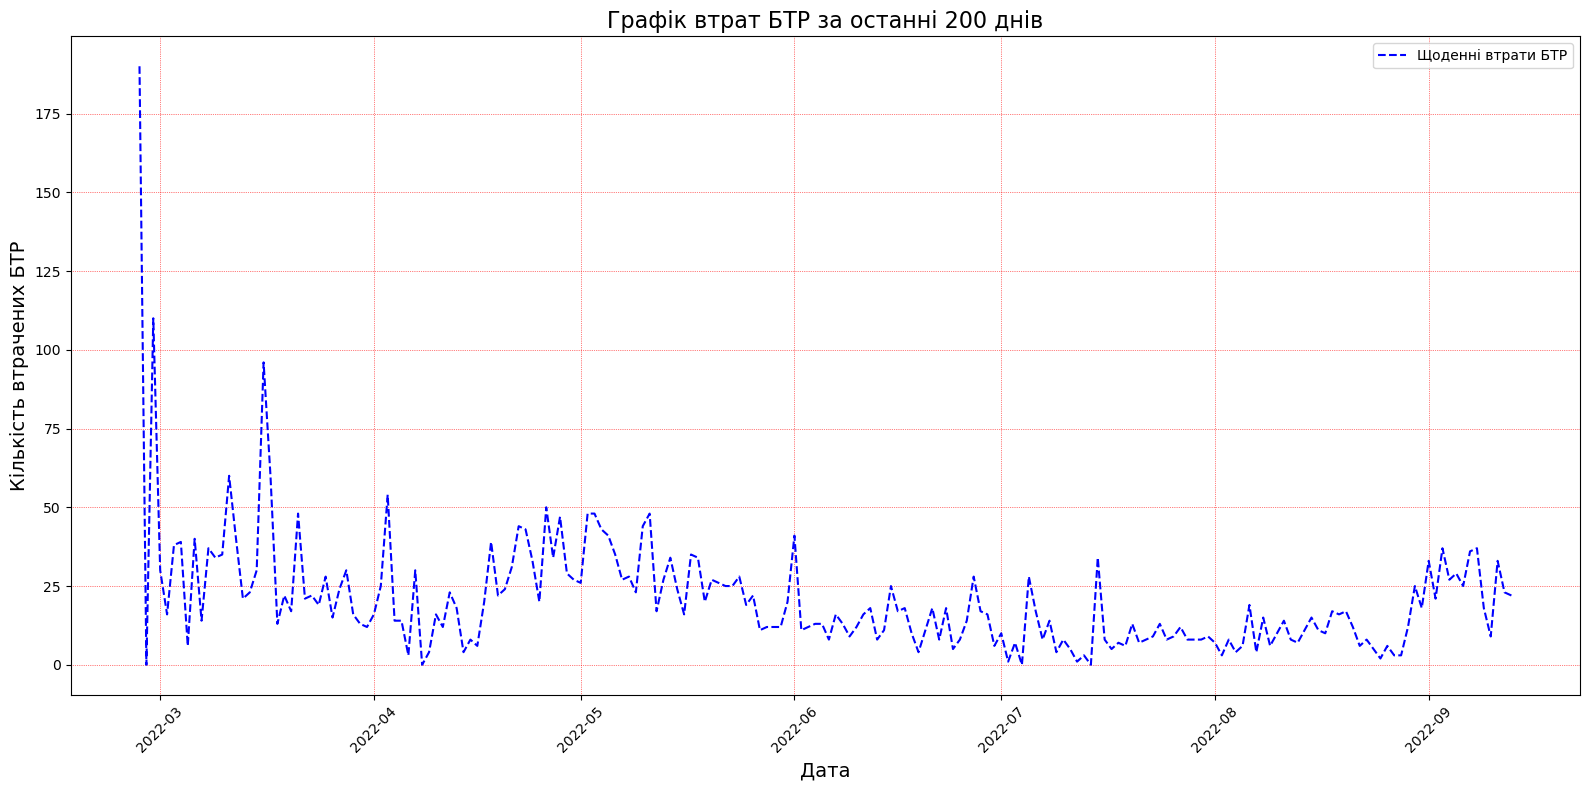

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

indices_200_days = np.arange(len(daily_apc_losses))[-200:]

filtered_indices = indices_200_days[indices_200_days < len(dates)]

recent_losses = daily_apc_losses[filtered_indices]
recent_dates = np.array(dates)[filtered_indices]

plt.figure(figsize=(16, 8), dpi=100)

plt.plot(recent_dates, recent_losses, linestyle='--', color='blue', label='Щоденні втрати БТР')

plt.title('Графік втрат БТР за останні 200 днів', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кількість втрачених БТР', fontsize=14)
plt.legend()
plt.grid(color='red', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('recent_apc_losses_200_days.png', format='png')
plt.show()